/tmp/ipykernel_2828770/1487887418.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(ppl_plot))


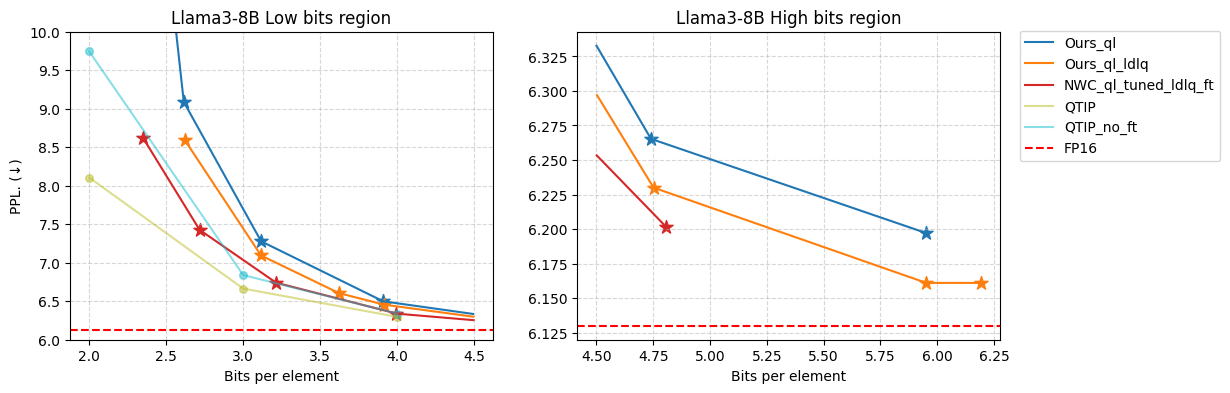

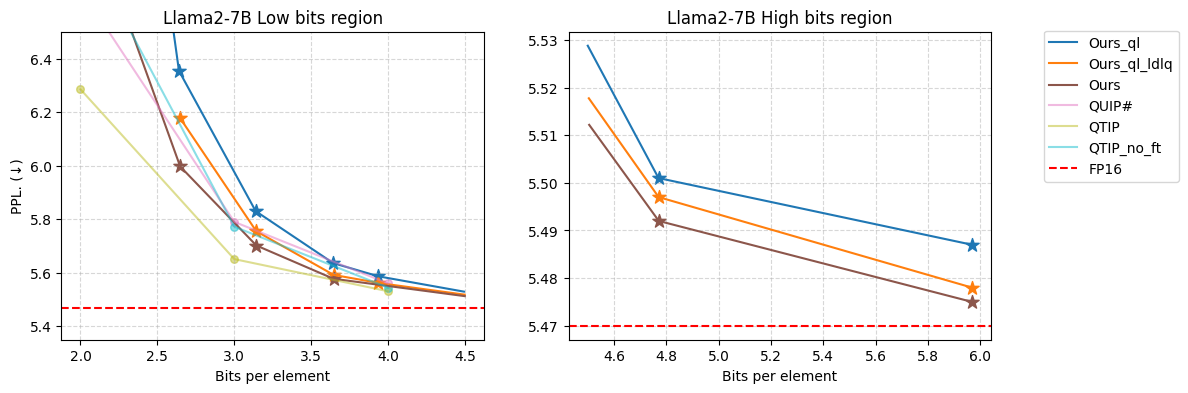

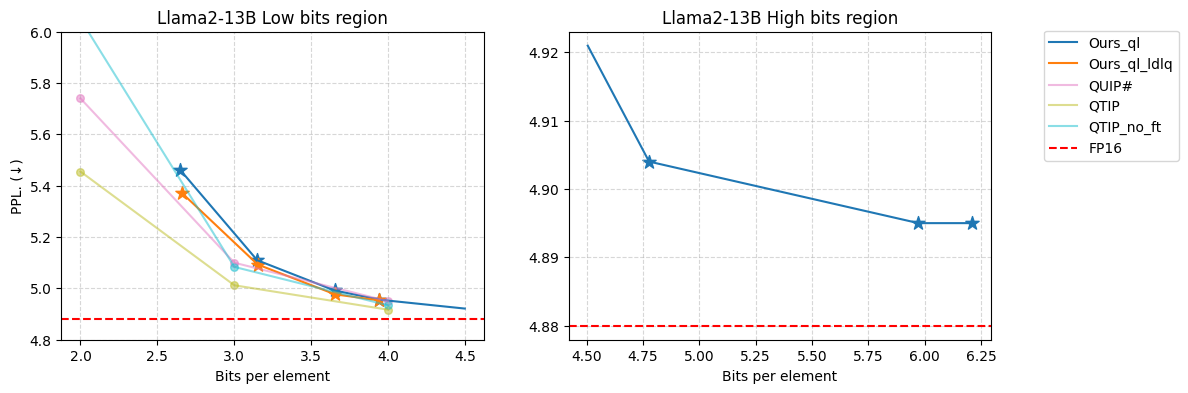

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# None 값을 np.nan으로 대체
def replace_none_with_nan(data):
    return np.array([np.nan if val is None else val for val in data])

ppl_plot = [
        # 'RTNg128',
        # 'SeedLM',
        # 'GPTQ',
        # 'AWQ',
        # 'OMNIQ',
        # 'Ours_base',
        'Ours_ql',
        'Ours_ql_ldlq',
        # 'NWC_RHT_scaled',
        # 'NWC_RHT_scaled_layerft',
        'NWC_ql_tuned_ldlq_ft',
        # 'NWC_RHT_scaled_ldlq',
        # 'NWC_global_ql',
        # 'NWC_global_ql_v2',
        # 'Ours_ft',
        'Ours',
        # 'AQLM',
        'QUIP#',
        'QTIP',
        'QTIP_no_ft',
    ]
import matplotlib.cm as cm
# cmap = cm.get_cmap('tab20b', len(ppl_plot))  
cmap = cm.get_cmap('tab10', len(ppl_plot))
colors = {k: cmap(i) for i, k in enumerate(ppl_plot)}

ppl_plot = [
        # 'RTNg128',
        # 'SeedLM',
        # 'GPTQ',
        # 'AWQ',
        # 'OMNIQ',
        # 'Ours_base',
        'Ours_ql',
        'Ours_ql_ldlq',
        # 'NWC_RHT_scaled',
        # 'NWC_RHT_scaled_layerft',
        'NWC_ql_tuned_ldlq_ft',
        # 'NWC_RHT_scaled_ldlq',
        # 'NWC_global_ql',
        # 'NWC_global_ql_v2',
        # 'Ours_ft',
        'Ours',
        # 'AQLM',
        'QUIP#',
        'QTIP',
        'QTIP_no_ft',
    ]


mse_plot = [
    ]

k_order = 1

ylim = {}
# ylim['Llama3-8B'] = (6, )
ylim['Llama3-8B'] = (6, 10)
ylim['Llama2-7B'] = (5.35, 9)
ylim['Llama2-7B'] = (5.35, 6.5)
# ylim['Llama2-7B'] = (None, None)
ylim['Llama2-13B'] = (4.8, 6)
# ylim['Llama2-13B'] = (4.8, 7)
# ylim['Llama2-13B'] = (None, None)

xlim = {}
xlim['Llama3-8B'] = (None, None)
xlim['Llama2-7B'] = (None, None)
xlim['Llama2-13B'] = (None, None)
# xlim['Llama3-8B'] = (2.7, None)
# xlim['Llama2-7B'] = (2.5, None)
# xlim['Llama2-13B'] = (2.5, None)

bit_split = 4.5

for m_name, plots in ppl_plots.items():
        fig, axs = plt.subplots(1, 2, figsize=(12, 4))
        # fig, axs = plt.subplots(1, 1, figsize=(8, 4))
        for k in ppl_plot:
            try:
                v = plots[k]
                if k in  ppl_plot:  
                    bpp = replace_none_with_nan(v['bpp'])
                    ppl = replace_none_with_nan(v['ppl'])

                    # 곡선 피팅
                    mask = np.isfinite(ppl)
                    # mask = ppl < 1000
                    x_smooth = np.linspace(bpp[mask].min(), bpp[mask].max(), 500)
                    spline = make_interp_spline(bpp[mask], ppl[mask], k=k_order)  # 3차 스플라인
                    y_smooth = spline(x_smooth)

                    if 'NWC' in k or 'Ours' in k:
                        alpha = 1
                        marker='*'
                        ms = 100
                    else:
                        marker='o'
                        alpha = 0.5
                        ms = 30
                    axs[0].plot(x_smooth[x_smooth <= bit_split], y_smooth[x_smooth <= bit_split], linestyle='-', color=colors[k], label=k, alpha = alpha)
                    axs[0].scatter(bpp[mask][bpp[mask] <= bit_split], ppl[mask][bpp[mask] <= bit_split], color=colors[k], marker=marker, s = ms, alpha = alpha)

                    axs[1].plot(x_smooth[x_smooth > bit_split], y_smooth[x_smooth > bit_split], linestyle='-', color=colors[k], label=k, alpha = alpha)
                    axs[1].scatter(bpp[mask][bpp[mask] > bit_split], ppl[mask][bpp[mask] > bit_split], color=colors[k], marker=marker,  s = ms, alpha = alpha)
            except:
                pass
        for ax in axs:
            ax.axhline(y=plots['FP16'], color='r', linestyle='--', label='FP16')
            ax.set_xlabel('Bits per element')
            # ax.legend()
            ax.grid(True, linestyle='--', alpha = 0.5)

        axs[0].set_title(f'{m_name} Low bits region')
        axs[0].set_ylabel('PPL. (↓)')
        axs[1].set_title(f'{m_name} High bits region')
        axs[0].set_ylim(ylim[m_name])
        axs[0].set_xlim(xlim[m_name])        
        # fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5)
        
        handles, labels = axs[0].get_legend_handles_labels()
        unique_labels = dict(zip(labels, handles))  # 중복 제거

        # 범례를 fig 밖으로 배치 (중복 제거된 항목만)
        fig.legend(unique_labels.values(), unique_labels.keys(), loc='upper center', bbox_to_anchor=(1, 0.9), ncol=1)

        
        # plt.suptitle(m_name)
        # plt.legend()
        plt.show()

        # # # MSE 그래프 생성
        # fig, axs = plt.subplots(1, 2, figsize=(16, 4))
        # for k, v in plots.items():
        #     if k in  mse_plot:  
        #         bpp = replace_none_with_nan(v['bpp'])
        #         mse = replace_none_with_nan(v['mse'])

        #         # 곡선 피팅
        #         mask = np.isfinite(mse)
        #         x_smooth = np.linspace(bpp[mask].min(), bpp[mask].max(), 500)
        #         spline = make_interp_spline(bpp[mask], mse[mask], k=k_order)  # 3차 스플라인
        #         y_smooth = spline(x_smooth)

        #         axs[0].plot(x_smooth[x_smooth <= bit_split], y_smooth[x_smooth <= bit_split], linestyle='-', color=colors[k], label=k)
        #         axs[0].scatter(bpp[mask][bpp[mask] <= bit_split], mse[mask][bpp[mask] <= bit_split], color=colors[k], marker='o')

        #         axs[1].plot(x_smooth[x_smooth > bit_split], y_smooth[x_smooth > bit_split], linestyle='-', color=colors[k], label=k)
        #         axs[1].scatter(bpp[mask][bpp[mask] > bit_split], mse[mask][bpp[mask] > bit_split], color=colors[k], marker='o')

        # for ax in axs:
        #     ax.axhline(y=0, color='r', linestyle='--', label='FP16')
        #     ax.set_xlabel('BPP')
        #     ax.grid(True)
            
        # axs[0].set_title('Low bits region')
        # axs[1].set_title('High bits region')
        # axs[0].set_ylabel('MSE (normalized)')
        # # axs[0].set_xlim(3, None)
        # # axs[0].set_ylim(None, 0.025)
        # # axs[1].set_xlim(5.4, 9)
        # plt.suptitle(m_name)
        # plt.legend()
        # plt.show()


# Ql grid search result plot

NameError: name 'ppl_plots' is not defined

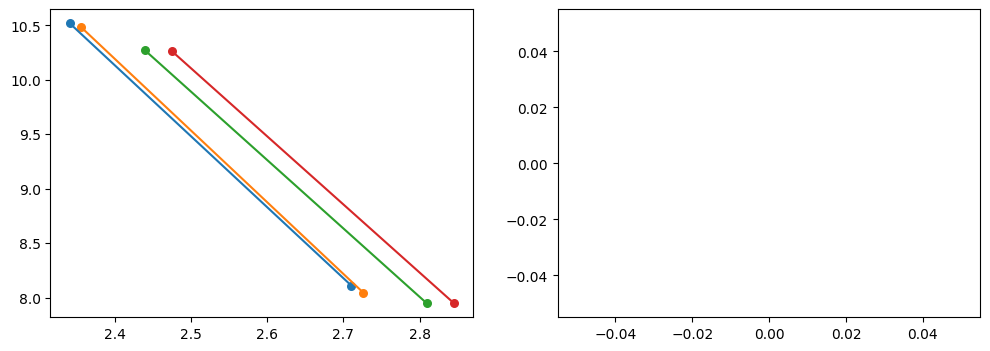

In [9]:
import os
import json
import glob
# dirpath = '/workspace/Weight_compression/hf_model_comp/comp_qtip/hf/ql_search'
dirpath = '/workspace/Weight_compression/hf_model_comp/comp_qtip/hf/ql_tuned_vo031'

ql_search_result = {}
# for l in ['q', 'k', 'v', 'o', 'up', 'gate', 'down']:
# for l in [0,1,2,5,10,30,31]:
# for l in [0,1,2,5]:
for l in ['vo']:
    for val in [0, 1, 2, 3]:
    # for val in [1]:
        # path = f'{dirpath}/layer{l}_val{val}'
        # path = f'{dirpath}/idx{l}_val{val}'
        path = f'{dirpath}/layer_val{val}'
        listdir = glob.glob(f'{path}/**/*_result.json')
        bpp = []
        ppl = []
        for file in listdir:
            try:
                with open(file, 'r') as f:
                    results = json.load(f)
                    ppl.append(results['ppl']['wikitext2'])
                    bpp.append(results['bpp_loss'])
            except:
                pass
        sorted_indices = sorted(range(len(bpp)), key=lambda i: bpp[i])
        bpp = [bpp[i] for i in sorted_indices]
        ppl = [ppl[i] for i in sorted_indices]
        
        ql_search_result[f'layer{l}_val{val}'] = {}
        ql_search_result[f'layer{l}_val{val}']['bpp'] = bpp
        ql_search_result[f'layer{l}_val{val}']['ppl'] = ppl

k_order = 1
bit_split = 4.5
marker='o'
alpha = 1
ms = 30
m_name = 'Llama3-8B'

# baselines = ['Ours_ql', 'QTIP_no_ft']
baselines = ['Ours_ql']

# for l in ['q', 'k', 'v', 'o', 'up', 'gate', 'down']:
# for l in [0,1,2,5,10,30,31]:
# for l in [0,1,2,5]:
for l in ['vo']:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    for val in [0, 1, 2, 3]:
    # for val in [1]: 
        v = ql_search_result[f'layer{l}_val{val}']

        bpp = replace_none_with_nan(v['bpp'])
        ppl = replace_none_with_nan(v['ppl'])

        # 곡선 피팅
        # mask = np.isfinite(ppl)
        # x_smooth = np.linspace(bpp[mask].min(), bpp[mask].max(), 500)
        # spline = make_interp_spline(bpp[mask], ppl[mask], k=k_order)  # 3차 스플라인
        # y_smooth = spline(x_smooth)              
        try:
            axs[0].plot(bpp[bpp <= bit_split], ppl[bpp <= bit_split], linestyle='-', label=f'{l}_qaulity{val}', alpha = alpha)
            axs[0].scatter(bpp[bpp <= bit_split], ppl[bpp <= bit_split], marker=marker, s = ms, alpha = alpha)

            axs[1].plot(bpp[bpp > bit_split], bpp[bpp > bit_split], linestyle='-', label=f'{l}_qaulity{val}', alpha = alpha)
            axs[1].scatter(bpp[bpp > bit_split], ppl[bpp > bit_split], marker=marker,  s = ms, alpha = alpha)
        except Exception as e:
            print(e)
        
        # axs[0].plot(x_smooth[x_smooth <= bit_split], y_smooth[x_smooth <= bit_split], linestyle='-', label=f'{l}_qaulity{val}', alpha = alpha)
        # # axs[0].plot(x_smooth[x_smooth <= bit_split], y_smooth[x_smooth <= bit_split], linestyle='-', label=f'vo_tuned', alpha = alpha)
        # axs[0].scatter(bpp[mask][bpp[mask] <= bit_split], ppl[mask][bpp[mask] <= bit_split], marker=marker, s = ms, alpha = alpha)

        # axs[1].plot(x_smooth[x_smooth > bit_split], y_smooth[x_smooth > bit_split], linestyle='-', label=f'{l}_qaulity{val}', alpha = alpha)
        # # axs[1].plot(x_smooth[x_smooth > bit_split], y_smooth[x_smooth > bit_split], linestyle='-', label=f'vo_tuned', alpha = alpha)
        # axs[1].scatter(bpp[mask][bpp[mask] > bit_split], ppl[mask][bpp[mask] > bit_split], marker=marker,  s = ms, alpha = alpha)

    for b in baselines:
        v = ppl_plots[m_name][b]
        bpp = replace_none_with_nan(v['bpp'])
        ppl = replace_none_with_nan(v['ppl'])

        mask = np.isfinite(ppl)
        x_smooth = np.linspace(bpp[mask].min(), bpp[mask].max(), 500)
        spline = make_interp_spline(bpp[mask], ppl[mask], k=k_order)  # 3차 스플라인
        y_smooth = spline(x_smooth)
        axs[0].plot(x_smooth[x_smooth <= bit_split], y_smooth[x_smooth <= bit_split], linestyle='-', label=b, alpha = 1)
        axs[0].scatter(bpp[mask][bpp[mask] <= bit_split], ppl[mask][bpp[mask] <= bit_split], marker='*', s = ms, alpha = 1)
        axs[1].plot(x_smooth[x_smooth > bit_split], y_smooth[x_smooth > bit_split], linestyle='-', label=b, alpha = 1)
        axs[1].scatter(bpp[mask][bpp[mask] > bit_split], ppl[mask][bpp[mask] > bit_split], marker='*',  s = ms, alpha = 1)

        axs[0].set_title(f'{m_name} Low bits region')
        axs[0].set_ylabel('PPL. (↓)')
        axs[1].set_title(f'{m_name} High bits region')
        axs[0].set_ylim((None, 16))
        # axs[0].set_xlim()

    for ax in axs:
        ax.axhline(y=plots['FP16'], color='r', linestyle='--', label='FP16')
        ax.set_xlabel('Bits per element')
        ax.legend()
        ax.grid(True, linestyle='--', alpha = 0.5)

    for ax in axs:
        ax.legend()

    handles, labels = axs[0].get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))  # 중복 제거

    # 범례를 fig 밖으로 배치 (중복 제거된 항목만)
    # fig.suptitle(l)
    # fig.legend(unique_labels.values(), unique_labels.keys(), loc='upper center', bbox_to_anchor=(1, 0.9), ncol=1)
    plt.show()

In [10]:
import glob
import json
path = '/workspace/Weight_compression/hf_model_comp/comp_qtip/hf/noft_ql/meta-llama--Meta-Llama-3-8B_col1024'
path = '/workspace/Weight_compression/hf_model_comp/comp_qtip/hf/ft_ql_tuned_ldlq/meta-llama--Meta-Llama-3-8B'
listdir = glob.glob(f'{path}/*_result.json')
print(listdir[:1])
bpp = []
ppl = []
for file in listdir:
    try:
        with open(file, 'r') as f:
            results = json.load(f)
            bpp.append(results['bpp_loss'])
            ppl.append(results['ppl']['wikitext2'])
    except:
        pass
sorted_indices = sorted(range(len(bpp)), key=lambda i: bpp[i])
bpp = [bpp[i] for i in sorted_indices]
ppl = [ppl[i] for i in sorted_indices]

print(bpp)
print(ppl)

['/workspace/Weight_compression/hf_model_comp/comp_qtip/hf/ft_ql_tuned_ldlq/meta-llama--Meta-Llama-3-8B/lmbda100_result.json']
[2.3503167743289954, 2.7167603686044073, 3.213820520092283, 3.9955983058457254, 4.806541982468179]
[8.618568420410156, 7.426833152770996, 6.740654945373535, 6.3390212059021, 6.201639652252197]


# llama3 8b

In [11]:
## llama3-8
ppl_plots = {}

plots = {}

plots['AWQ'] = {}
plots['AWQ']['bpp'] = [2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25]
plots['AWQ']['ppl'] = [1706217.75, 8.243, 6.531, 6.237, 6.157, 6.141, 6.138]
plots['AWQ']['mse'] = [23,21,18,189,21,18, 23]

plots['OMNIQ'] = {}
plots['OMNIQ']['bpp'] = [None]
plots['OMNIQ']['ppl'] = [None]

plots['QUIP#_no_ft'] = {}
plots['QUIP#_no_ft']['bpp'] = [None]
plots['QUIP#_no_ft']['ppl'] = [None]

plots['QUIP#'] = {}
plots['QUIP#']['bpp'] = [None]
plots['QUIP#']['ppl'] = [None]

plots['QTIP_no_ft'] = {}
plots['QTIP_no_ft']['bpp'] = [None]
plots['QTIP_no_ft']['ppl'] = [None]

plots['QTIP'] = {}
plots['QTIP']['bpp'] = [2, 3, 4]
plots['QTIP']['ppl'] = [8.106,6.664,6.297]

plots['QTIP_no_ft'] = {}
plots['QTIP_no_ft']['bpp'] = [2,3,4]
plots['QTIP_no_ft']['ppl'] = [9.744,6.840,6.339]

plots['RTNg128'] = {}
plots['RTNg128']['bpp'] = [2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25]
plots['RTNg128']['ppl'] = [295954.625, 12.141, 6.731, 6.304, 6.186, 6.150, 6.140]
plots['RTNg128']['mse'] = [0.2619, 0.0489, 0.0107, 0.0025, 0.0006, 0.0002, 4.6240e-05]

plots['RTN'] = {}
plots['RTN']['bpp'] = [2, 3, 4, 5, 6, 7, 8]
plots['RTN']['ppl'] = [1385877.125, 2276.227, 8.537, 6.561, 6.270, 6.173, 6.149]
plots['RTN']['mse'] = [0.5205, 0.1124, 0.0253, None, 0.0015, None, 9.9967e-05]

plots['VQVAE_old'] = {}
plots['VQVAE_old']['bpp'] = [2,3,4,5,6,8] 
plots['VQVAE_old']['ppl'] = [801779, 110.0668, 10.7364, 7.8319, 7.6031, 7.5663]
plots['VQVAE_old']['mse'] = [0.1144, 0.0389, 0.0186, 0.0049, 0.0028, 0.0020]

plots['VQVAE'] = {}
plots['VQVAE']['bpp'] = [3, 4, 5, 6, 8]
plots['VQVAE']['ppl'] = [24.881,7.194, 6.470, 6.215, 6.177]
plots['VQVAE']['mse'] = [0.03701, 0.01228, 0.00365, 0.00101, 9e-5]

plots['VQVAE_idx'] = {}
plots['VQVAE_idx']['bpp'] = [3, 4, 6, 8] 
plots['VQVAE_idx']['ppl'] = [50.871, 7.739, None, 6.223]
plots['VQVAE_idx']['mse'] = [0.0369, 0.0192, 0.0027, 0.0010]

plots['VQVAE_idx_row'] = {}
plots['VQVAE_idx_row']['bpp'] = [3, 4, 5, 6, 7, 8] 
plots['VQVAE_idx_row']['ppl'] = [159.215, 7.852, None, 6.545, None, 6.166]
plots['VQVAE_idx_row']['mse'] = [0.0410, 0.0123, 0.0064, 0.0033, 0.0026, 0.0002]

plots['SeedLM'] = {}
plots['SeedLM']['bpp'] = [3, 4]
plots['SeedLM']['ppl'] = [10.1, 7.0]
plots['SeedLM']['mse'] = [0.0388, 0.0081]

plots['NWC_row16'] = {}
plots['NWC_row16']['bpp'] = [6.398, 8.22, 10.074, 10.108]
plots['NWC_row16']['ppl'] = [6.828, 6.212, 6.162, 6.158]
plots['NWC_row16']['mse'] = [0.00725, 0.00076, 0.00017, 0.00016]

plots['NWC_col128'] = {}
plots['NWC_col128']['bpp'] = [3.27539, 3.77784, 4.57791, 5.44646, 7.08356, 7.8364]
plots['NWC_col128']['ppl'] = [9.072, 7.492, 6.392, 6.222, 6.142, 6.140]
plots['NWC_col128']['mse'] = [0.01454, 0.00729, 0.00245, 0.00075, 8e-05, 3e-05]

plots['NWC_row128'] = {}
plots['NWC_row128']['bpp'] = [3.64225, 4.14475, 4.9485, 5.828, 7.466, 8.2165]
plots['NWC_row128']['ppl'] = [8.000, 6.922, 6.375, 6.225, 6.146, 6.142]
plots['NWC_row128']['mse'] = [0.01454, 0.00729, 0.00245, 0.00075, 8e-05, 3e-05]

plots['NWC_row16_bundle'] = {}
plots['NWC_row16_bundle']['bpp'] = [2.898, 3.311, 3.81, 4.27, 5.47, 6.474, 6.644]
plots['NWC_row16_bundle']['ppl'] = [11.542, 7.724, 6.876, 6.501, 6.228, 6.167, 6.160]
plots['NWC_row16_bundle']['mse'] = [0.0145, 0.0072, 0.00363, 0.0008, 0.0003, 0.0002]
plots['NWC'] = plots['NWC_row16_bundle']
plots['Ours_base'] = plots['NWC_row16_bundle']

plots['NWC_col_tr'] = {}
plots['NWC_col_tr']['bpp'] = [3.249,3.752,4.529,5.325,6.613,7.142]
plots['NWC_col_tr']['ppl'] = [8.558,7.841,6.903,6.535,6.283,6.288]
plots['NWC_tr'] = plots['NWC_col_tr']

plots['NWC_col_tr_hpy'] = {}
plots['NWC_col_tr_hpy']['bpp'] = [3.266,3.753,4.511,5.311,6.443,6.715]
plots['NWC_col_tr_hpy']['ppl'] = [10.579,7.981,6.941,6.655,6.435,6.383]
plots['NWC_tr_hpy'] = plots['NWC_col_tr_hpy']

plots['NWC_row16_bundle_rht_trained'] = {}
plots['NWC_row16_bundle_rht_trained']['bpp'] = [3.290,3.791,4.296,4.589]
plots['NWC_row16_bundle_rht_trained']['ppl'] = [7.703,6.838,6.493,6.378]
plots['Ours_RHT_no_ql_trained'] = plots['NWC_row16_bundle_rht_trained']

plots['NWC_row16_bundle_ROWCOL'] = {}
plots['NWC_row16_bundle_ROWCOL']['bpp'] = [3.311, 3.81, 4.27, 5.47, 6.474, 6.644]
plots['NWC_row16_bundle_ROWCOL']['ppl'] = [7.724, 6.876, 6.501, 6.228, 6.167, 6.160]
plots['NWC_row16_bundle_ROWCOL']['mse'] = [0.0145, 0.0072, 0.00363, 0.0008, 0.0003, 0.0002]

plots['NWC_ql_random_seq16(loss)'] = {}
plots['NWC_ql_random_seq16(loss)']['bpp'] = [2.56, 3.058, 3.56, 3.86, 4.70, 5.93]
plots['NWC_ql_random_seq16(loss)']['ppl'] = [11.939, 7.735, 6.891, 6.640, 6.294, 6.187]
plots['NWC_ql_random_seq16(loss)']['mse'] = [0.04085, 0.02041, 0.01026, 0.00690, 0.00215, 0.00052]

plots['NWC_ql_random_seq16'] = {}
plots['NWC_ql_random_seq16']['bpp'] = [2.573, 3.0733, 3.579, 3.873, 4.7203, 5.9474]
plots['NWC_ql_random_seq16']['ppl'] = [11.939, 7.735, 6.891, 6.640, 6.294, 6.187]
plots['NWC_ql_random_seq16']['mse'] = [0.04085, 0.02041, 0.01026, 0.00690, 0.00215, 0.00052]

# plots['NWC_ql_random_seq16_2'] = {}
# plots['NWC_ql_random_seq16_2']['bpp'] = [2.242, 2.613881, 3.11315, 3.618142049, 3.9107435, 4.75101, 5.952254, 6.1921]
# plots['NWC_ql_random_seq16_2']['ppl'] = [15.875, 9.312, 7.258, 6.721, 6.509, 6.259, 6.183, 6.184]
# plots['NWC_ql_random_seq16_2']['mse'] = [0.03902, 0.0195, 0.009806, 0.00661, 0.00206, 0.000506, 0.000446]
# plots['Ours_ql'] = plots['NWC_ql_random_seq16_2']

## col 1024 quip hess
plots['NWC_ql_random_seq16_2'] = {}
plots['NWC_ql_random_seq16_2']['bpp'] = [2.241779004331105, 2.614222769912046, 3.116372105235664, 3.909219218346362, 4.739989903110724, 5.949137418745802]
plots['NWC_ql_random_seq16_2']['ppl'] = [15.8749418258667, 9.087989807128906, 7.278524398803711, 6.499088287353516, 6.2653279304504395, 6.1972503662109375]
plots['Ours_ql'] = plots['NWC_ql_random_seq16_2']

plots['NWC_ql_random_seq16_ldlq'] = {}
plots['NWC_ql_random_seq16_ldlq']['bpp'] = [2.6198,3.1161,3.6198,3.9119,4.7514,5.9525,6.1922]
plots['NWC_ql_random_seq16_ldlq']['ppl'] = [8.595,7.094,6.607,6.456,6.23,6.161,6.161]
plots['Ours_ql_ldlq'] = plots['NWC_ql_random_seq16_ldlq']

plots['NWC_ql_random_seq16_n6144'] = {}
plots['NWC_ql_random_seq16_n6144']['bpp'] = [2.6134, 3.1127, 3.6177, 3.9103, 4.7507,5.9521,6.1921]
plots['NWC_ql_random_seq16_n6144']['ppl'] = [9.185,7.277,6.714,6.521,6.265,6.184,6.185]
plots['Ours_n6144'] = plots['NWC_ql_random_seq16_n6144']

plots['NWC_ql_Q4'] = plots['NWC_ql_random_seq16_2']

plots['NWC_ql_Q4_uniform'] = {}
plots['NWC_ql_Q4_uniform']['bpp'] = [4.377752911, 4.86104, 5.4637, 5.87986, 6.23135021]
plots['NWC_ql_Q4_uniform']['ppl'] = [6.951, 6.544, 6.306, 6.218, 6.175]

plots['NWC_ql_Q8'] = {}
plots['NWC_ql_Q8']['bpp'] = [2.60743, 3.1143509, 3.903865, 4.7208657]
plots['NWC_ql_Q8']['ppl'] = [9.349, 7.344, 6.52, 6.289]

plots['NWC_ql_Q8_uniform'] = {}
plots['NWC_ql_Q8_uniform']['bpp'] = [5.0481215,5.4334279, 5.9105,6.115277]
plots['NWC_ql_Q8_uniform']['ppl'] = [6.661, 6.436, 6.287, 6.22]

plots['NWC_ql_Q16'] = {}
plots['NWC_ql_Q16']['bpp'] = [3.02635, 3.51864341, 4.27595, 5.054298]
plots['NWC_ql_Q16']['ppl'] = [7.758, 6.933, 6.431, 6.29]

plots['NWC_hesseigen'] = {}
plots['NWC_hesseigen']['bpp'] = [4.8644537, 5.2838, 5.7891, 6.10161]
plots['NWC_hesseigen']['ppl'] = [6.315, 6.244, 6.193, 6.178]
plots['NWC_hesseigen']['mse'] = [0.001812, 0.00112, 0.00064, 0.0005009]

plots['NWC_gaussian_seq16'] = {}
plots['NWC_gaussian_seq16']['bpp'] = [3.36442, 3.8647, 4.36402, 5.50448, 6.66792, 6.73752]
plots['NWC_gaussian_seq16']['ppl'] = [7.993, 6.885, 6.561, 6.406, 7.829, 6.752]
plots['NWC_gaussian_seq16']['mse'] = [0.01445, 0.00724, 0.00365, 0.00091, 0.00196, 0.00097]

plots['nwc_hp_row_seq16'] = {}
plots['nwc_hp_row_seq16']['bpp'] = [3.34822, 3.852, 4.37264, 5.51448,	6.5558]
plots['nwc_hp_row_seq16']['ppl'] = [7.735, 6.845, 6.5, 6.215, 6.168]
plots['nwc_hp_row_seq16']['mse'] = [0.01447, 0.00725, 0.00363, 0.00077, 0.00023]


# ## NWC_col128
plots['Entropy(loss)'] = {}
plots['Entropy(loss)']['bpp'] = [3.27539, 3.77784, 4.57791, 5.44646, 7.08356, 7.8364]
plots['Entropy(loss)']['ppl'] = [8.000, 6.922, 6.375, 6.225, 6.146, 6.142]
plots['Entropy(loss)']['mse'] = [0.01454, 0.00729, 0.00245, 0.00075, 8e-05, 3e-05]

plots['NWC_ql_col16'] = {}
plots['NWC_ql_col16']['bpp'] = [2.90884, 4.55409, 5.89107, 6.10535]
plots['NWC_ql_col16']['ppl'] = [7.921, 6.342, 6.262, 6.265]
plots['NWC_ql_col16']['mse'] = [0.02425, 0.00252, 0.00051, 0.00043]

plots['NWC_ql_random_col128'] = {}
plots['NWC_ql_random_col128']['bpp'] = [3.06427, 3.58498, 4.73994, 6.38184, 7.12939]
plots['NWC_ql_random_col128']['ppl'] = [9.733, 6.790, 6.268, 6.154, 6.146]
plots['NWC_ql_random_col128']['mse'] = [0.02039, 0.01025, 0.00205, 0.00022, 8e-05]

plots['NWC_row16'] = {}
plots['NWC_row16']['bpp'] = [6.014, 6.39, 8.22]
plots['NWC_row16']['ppl'] = [7.796, 6.844, 6.217]
plots['NWC_row16']['mse'] = [0.0145, 0.00725, 0.00076]

plots['NWC_col16'] = {}
plots['NWC_col16']['bpp'] = [6.13, 6.424]
plots['NWC_col16']['ppl'] = [7.830, 6.849]
plots['NWC_col16']['mse'] = [0.0145, 0.00725]

plots['NWC_gaussian16'] = {}
plots['NWC_gaussian16']['bpp'] = [6.12, 6.38, 8.054]
plots['NWC_gaussian16']['ppl'] = [8.084, 6.935, 6.230]
plots['NWC_gaussian16']['mse'] = [0.0146, 0.00723, 0.00077]

plots['NWC_col16_seq_rescale3'] ={}
plots['NWC_col16_seq_rescale3']['bpp'] = [2.112694778,3.274334534,3.77466374,5.422167316]
plots['NWC_col16_seq_rescale3']['ppl'] = [13.22559929,6.886213779,6.501080513,6.177906513]

plots['NWC_col16_seq_rescale3_ldlq'] ={}
plots['NWC_col16_seq_rescale3_ldlq']['bpp'] = [2.12166928,3.276129064,3.775550555,5.42227727]
plots['NWC_col16_seq_rescale3_ldlq']['ppl'] = [12.93155766,6.764129162,6.444180012,6.169330597]

plots['NWC_RHT_scaled'] = {}
plots['NWC_RHT_scaled']['bpp'] = [2.113,2.906,3.274,3.775,4.275,4.576,5.422]
plots['NWC_RHT_scaled']['ppl'] = [13.226,7.450,6.886,6.501,6.320,6.262,6.178]

plots['NWC_RHT_scaled_layerft'] = {}
plots['NWC_RHT_scaled_layerft']['bpp'] = [2.0897195665882182, 2.878303707505648, 3.2459880529114833, 3.748942504422023, 4.251879811286926, 4.548974734372818, 5.402224775403738]
plots['NWC_RHT_scaled_layerft']['ppl'] = [13.459770202636719, 7.43629264831543, 6.852028846740723, 6.492372989654541, 6.3184614181518555, 6.249212741851807, 6.172792434692383]

plots['NWC_RHT_scaled_ldlq'] = {}
plots['NWC_RHT_scaled_ldlq']['bpp'] = [2.122,2.909,3.276,3.776,4.275,4.576,5.422]
plots['NWC_RHT_scaled_ldlq']['ppl'] = [12.932,7.231,6.764,6.444,6.290,6.240,6.169]

plots['NWC_ql_tuned_ldlq_ft'] = {}
plots['NWC_ql_tuned_ldlq_ft']['bpp'] = [2.3503167743289954, 2.7167603686044073, 3.213820520092283, 3.9955983058457254, 4.806541982468179]
plots['NWC_ql_tuned_ldlq_ft']['ppl'] = [8.618568420410156, 7.426833152770996, 6.740654945373535, 6.3390212059021, 6.201639652252197]


# [2.3503167743289954, 2.7167603686044073, 3.213820520092283, 3.9955983058457254, 4.806541982468179]
# [8.618568420410156, 7.426833152770996, 6.740654945373535, 6.3390212059021, 6.201639652252197]

# FP16 = 6.13
plots['FP16'] = 6.13

ppl_plots['Llama3-8B'] = plots

# llama2 7b

In [12]:
plots = {}

plots['AWQ'] = {}
plots['AWQ']['bpp'] = [2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25]
plots['AWQ']['ppl'] = [227242.422, 6.208, 5.608, 5.505, 5.481, 5.469, 5.47]
# plots['AWQ']['mse'] = [23,21,18,189,21,18, 23]

plots['OMNIQ'] = {}
plots['OMNIQ']['bpp'] = [2, 3, 4]
plots['OMNIQ']['ppl'] = [37.4, 6.58, 5.74]

plots['QUIP#_no_ft'] = {}
plots['QUIP#_no_ft']['bpp'] = [2, 3, 4]
plots['QUIP#_no_ft']['ppl'] = [12.3, 6.19, 5.66]

plots['QUIP#'] = {}
plots['QUIP#']['bpp'] = [2, 3, 4]
plots['QUIP#']['ppl'] = [6.66, 5.79, 5.56]

plots['QTIP_no_ft'] = {}
plots['QTIP_no_ft']['bpp'] = [2, 3, 4]
plots['QTIP_no_ft']['ppl'] = [6.85181999206543, 5.77194, 5.5444]

plots['QTIP'] = {}
plots['QTIP']['bpp'] = [2, 3, 4]
plots['QTIP']['ppl'] = [6.285030841827393, 5.6509785652160645, 5.530890464782715]

plots['GPTQ'] = {}
plots['GPTQ']['bpp'] = [2, 3, 4]
plots['GPTQ']['ppl'] = [165.151,6.673,5.788]

plots['SeedLM'] = {}
plots['SeedLM']['bpp'] = [3, 4]
plots['SeedLM']['ppl'] = [6.6, 5.7]
# plots['SeedLM']['mse'] = [0.0388, 0.0081]

plots['NWC_row16_bundle'] = {}
plots['NWC_row16_bundle']['bpp'] = [2.923, 3.292, 3.7914, 4.2906, 5.4399, 6.445, 6.6136]
plots['NWC_row16_bundle']['ppl'] = [7.265, 6.132, 5.72, 5.605, 5.495, 5.476, 5.485]
# plots['NWC_row16_bundle']['mse'] = [0.0145, 0.0072, 0.00363, 0.0008, 0.0003, 0.0002]
plots['NWC'] = plots['NWC_row16_bundle']
plots['Ours_base'] = plots['NWC_row16_bundle']


plots['NWC_row16_bundle_rht'] = {}
plots['NWC_row16_bundle_rht']['bpp'] = [3.31003, 3.80728, 4.30509, 5.45322, 6.45817405]
plots['NWC_row16_bundle_rht']['ppl'] = [6.0841, 5.7096, 5.605, 5.4826, 5.4730243]
# plots['NWC_row16_bundle']['mse'] = [0.0145, 0.0072, 0.00363, 0.0008, 0.0003, 0.0002]
plots['Ours_RHT_no_ql'] = plots['NWC_row16_bundle_rht']

plots['NWC_row16_bundle_rht_trained'] = {}
plots['NWC_row16_bundle_rht_trained']['bpp'] = [3.307,3.807,4.310,4.602]
plots['NWC_row16_bundle_rht_trained']['ppl'] = [6.098,5.717,5.583,5.541]
plots['Ours_RHT_no_ql_trained'] = plots['NWC_row16_bundle_rht_trained']

plots['NWC_ql_random_seq16'] = {}
plots['NWC_ql_random_seq16']['bpp'] = [2.269, 2.6401, 3.138932, 3.64297201, 3.9338092, 4.770383, 5.96783319, 6.206536][:-1]
plots['NWC_ql_random_seq16']['ppl'] = [7.891, 6.354, 5.83, 5.636, 5.587, 5.501, 5.487, 5.497][:-1]
# plots['NWC_ql_random_seq16']['mse'] = [0.04085, 0.02041, 0.01026, 0.00690, 0.00215, 0.00052]
plots['Ours_ql'] = plots['NWC_ql_random_seq16']

plots['NWC_ql_random_seq16_rht'] = {}
plots['NWC_ql_random_seq16_rht']['bpp'] = [3.320,3.857,4.396,4.696]
plots['NWC_ql_random_seq16_rht']['ppl'] = [6.414,5.793,5.606,5.559]
plots['Ours_RHT'] = plots['NWC_ql_random_seq16_rht']

plots['NWC_ql_random_seq16_ft'] = {}
plots['NWC_ql_random_seq16_ft']['bpp'] = [2.640922043993683, 3.1394193181719805, 3.643218957389575, 3.9339819589118266]
plots['NWC_ql_random_seq16_ft']['ppl'] = [6.095, 5.737, 5.607, 5.560]
plots['Ours_ft'] = plots['NWC_ql_random_seq16_ft']

plots['NWC_ql_random_seq16_gptq'] = {}
plots['NWC_ql_random_seq16_gptq']['bpp'] = [2.648347,3.143081,3.64518,3.935356,4.77088256,5.967929,6.20653]
plots['NWC_ql_random_seq16_gptq']['ppl'] = [6.263,5.77,5.628,5.583,5.516,5.484,5.488]
# plots['NWC_ql_random_seq16']['mse'] = [0.04085, 0.02041, 0.01026, 0.00690, 0.00215, 0.00052]
plots['Ours_gptq'] = plots['NWC_ql_random_seq16_gptq']

plots['NWC_ql_random_seq16_ldlq'] = {}
plots['NWC_ql_random_seq16_ldlq']['bpp'] = [2.648,3.1429,3.6451, 3.9353,4.7709,5.9679,6.2066][:-1]
plots['NWC_ql_random_seq16_ldlq']['ppl'] = [6.177,5.755,5.592,5.562,5.497,5.478,5.483][:-1]
plots['Ours_ql_ldlq'] = plots['NWC_ql_random_seq16_ldlq']

## ours_ql_ft_ldlq
plots['Ours'] = {}
plots['Ours']['bpp'] = [2.28240699,2.648025293,3.143159624,3.64486945,4.771,5.968]
plots['Ours']['ppl'] = [6.580651283,5.996817589,5.7018013,5.577580929,5.492,5.475]

plots['NWC_ql_random_seq16_n6144'] = {}
plots['NWC_ql_random_seq16_n6144']['bpp'] = [2.639781555,3.1386,3.6427,3.9335,4.7701,5.9677,6.02065]
plots['NWC_ql_random_seq16_n6144']['ppl'] = [6.346, 5.837,5.627,5.58,5.506,5.485,5.495]
plots['Ours_n6144'] = plots['NWC_ql_random_seq16_n6144']

plots['NWC_ql_random_seq16(2-7b)'] = {}
plots['NWC_ql_random_seq16(2-7b)']['bpp'] = [2.64962, 3.15262, 3.940098, 4.762928095, 5.93973]
plots['NWC_ql_random_seq16(2-7b)']['ppl'] = [6.384, 5.813, 5.573, 5.513, 5.497]
plots['Ours_in_domain'] = plots['NWC_ql_random_seq16(2-7b)']

plots['NWC_RHT_scaled'] = {}
plots['NWC_RHT_scaled']['bpp'] = [2.136,3.297,3.798,4.589]
plots['NWC_RHT_scaled']['ppl'] = [7.635,5.698,5.575,5.503]

# plots['NWC_RHT_scaled_ldlq'] = {}
# plots['NWC_RHT_scaled_ldlq']['bpp'] = [2.122,2.909,3.276,3.776,4.275,5.422]
# plots['NWC_RHT_scaled_ldlq']['ppl'] = [12.932,7.231,6.764,6.444,6.290,6.169]


plots['NWC_global_ql'] ={}
plots['NWC_global_ql']['bpp'] = [2.619,3.118,3.913,4.752]
plots['NWC_global_ql']['ppl'] = [6.349,5.793,5.566,5.501]


plots['NWC_global_ql_v2'] ={}
plots['NWC_global_ql_v2']['bpp'] = [2.6516477477982874,3.150353873023097, 3.9453540001199654]
plots['NWC_global_ql_v2']['ppl'] = [6.241876125335693,5.752368927001953, 5.557637691497803]


plots['FP16'] = 5.47

ppl_plots['Llama2-7B'] = plots

# llama2 13b

In [13]:
plots = {}

plots['AWQ'] = {}
plots['AWQ']['bpp'] = [2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25]
plots['AWQ']['ppl'] = [124179.172, 5.32, 4.974, 4.909, 4.888, 4.884, 4.882]
# plots['AWQ']['mse'] = [23,21,18,189,21,18, 23]

plots['OMNIQ'] = {}
plots['OMNIQ']['bpp'] = [2, 3, 4]
plots['OMNIQ']['ppl'] = [17.2, 5.58, 5.02]

plots['QUIP#_no_ft'] = {}
plots['QUIP#_no_ft']['bpp'] = [2, 3, 4]
plots['QUIP#_no_ft']['ppl'] = [7.60,  5.34, 5.00]

plots['QUIP#'] = {}
plots['QUIP#']['bpp'] = [2, 3, 4]
plots['QUIP#']['ppl'] = [5.74, 5.10, 4.95]

plots['QTIP_no_ft'] = {}
plots['QTIP_no_ft']['bpp'] = [2, 3, 4]
plots['QTIP_no_ft']['ppl'] = [6.048793315887451, 5.083630561828613, 4.933897972106934]

plots['QTIP'] = {}
plots['QTIP']['bpp'] = [2, 3, 4]
plots['QTIP']['ppl'] = [5.455090522766113, 5.012054443359375, 4.916851043701172]

plots['SeedLM'] = {}
plots['SeedLM']['bpp'] = [3, 4]
plots['SeedLM']['ppl'] = [5.8, 5.1]

plots['NWC_row16_bundle'] = {}
plots['NWC_row16_bundle']['bpp'] = [3.3001, 3.7982, 4.297, 5.4459, 6.451, 6.6196]
plots['NWC_row16_bundle']['ppl'] = [5.243, 5.028, 4.965, 4.901, 4.896, 4.896]
# plots['NWC_row16_bundle']['mse'] = [0.0145, 0.0072, 0.00363, 0.0008, 0.0003, 0.0002]

plots['NWC_ql_random_seq16'] = {}
plots['NWC_ql_random_seq16']['bpp'] = [2.648769, 3.147446, 3.65101, 3.94146191, 4.776916, 5.97267, 6.2108]
plots['NWC_ql_random_seq16']['ppl'] = [5.461, 5.11, 4.992, 4.956, 4.904, 4.895, 4.895]
# plots['NWC_ql_random_seq16']['mse'] = [0.04085, 0.02041, 0.01026, 0.00690, 0.00215, 0.00052]

plots['NWC_ql_random_seq16(2-13B)'] = {}
plots['NWC_ql_random_seq16(2-13B)']['bpp'] = [2.657869, 3.160482, 3.94592, 4.76725, 5.913]
plots['NWC_ql_random_seq16(2-13B)']['ppl'] = [5.421, 5.121, 4.97, 4.934, 4.902]
# plots['NWC_ql_random_seq16']['mse'] = [0.04085, 0.02041, 0.01026, 0.00690, 0.00215, 0.00052]

plots['NWC_ql_random_seq16_gptq'] = {}
plots['NWC_ql_random_seq16_gptq']['bpp'] = [2.6571,3.1517,3.6533,3.943,4.7774,5.9728, 6.2109]
plots['NWC_ql_random_seq16_gptq']['ppl'] = [5.424,5.09,4.991,4.955,4.903,4.889, 4.891]
# plots['NWC_ql_random_seq16']['mse'] = [0.04085, 0.02041, 0.01026, 0.00690, 0.00215, 0.00052]
plots['Ours_gptq'] = plots['NWC_ql_random_seq16_gptq']

plots['NWC_ql_random_seq16_ldlq'] = {}
plots['NWC_ql_random_seq16_ldlq']['bpp'] = [2.6568,3.1515,3.6532,3.943]
plots['NWC_ql_random_seq16_ldlq']['ppl'] = [5.3730,5.093,4.977,4.953]
plots['Ours_ql_ldlq'] = plots['NWC_ql_random_seq16_ldlq']

plots['NWC_ql_random_seq16_n6144'] = {}
plots['NWC_ql_random_seq16_n6144']['bpp'] = [2.6486, 3.1472, 3.6508, 3.9413, 5.9726, 6.2108]
plots['NWC_ql_random_seq16_n6144']['ppl'] = [5.515, 5.122, 5.005,4.955,4.901,4.889]
plots['Ours_n6144'] = plots['NWC_ql_random_seq16_n6144']

# FP16 = 4.88
plots['FP16'] = 4.88

plots['NWC'] = {}
plots['NWC'] = plots['NWC_row16_bundle']
plots['Ours_base'] = plots['NWC_row16_bundle']

plots['Ours_ql'] = {}
plots['Ours_ql'] = plots['NWC_ql_random_seq16']

plots['Ours_in_domain'] = {}
plots['Ours_in_domain'] = plots['NWC_ql_random_seq16(2-13B)']

ppl_plots['Llama2-13B'] = plots